In [1]:
%run -m ipy_startup
%matplotlib inline
%load_ext rpy2.ipython
from ml import query
from pbto2 import data

In [2]:
d = data.get_raw_data()
d = d[~d['gos-3'].isnull()]
d = d[~d['marshall'].isnull()]
d = d[~d['pbto2'].isnull()]
d = d[d['tsa_min'] < 4320]
#d = d[d['tsi_min'] <= 4320]
#d = d[d['tsi_min'] <= 1440]
#d = d[d['tsi_min'] <= 2880]
#d = d[d['pbto2'] > 0]
#d = d.iloc[np.random.permutation(np.arange(len(d)))[:5000],:]
d['gos-3-binary'] = d['gos-3'].apply(lambda x: 0 if x <= 3 else 1)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13025 entries, 0 to 22314
Data columns (total 38 columns):
base_deficit_arterial    2582 non-null float64
base_excess_arterial     1403 non-null float64
blood_gases              3964 non-null datetime64[ns]
datetime                 13025 non-null datetime64[ns]
hco3a                    3924 non-null float64
icp1                     8592 non-null float64
icp2                     4797 non-null float64
map                      8369 non-null float64
paco2                    3945 non-null float64
pao2                     3946 non-null float64
pbto2                    13025 non-null float64
pha                      3948 non-null float64
pupil_response_l         4450 non-null float64
pupil_response_r         4403 non-null float64
pupil_size_l             3548 non-null float64
pupil_size_r             3548 non-null float64
sao2                     2659 non-null float64
sheet_name               13025 non-null float64
spo2                     126

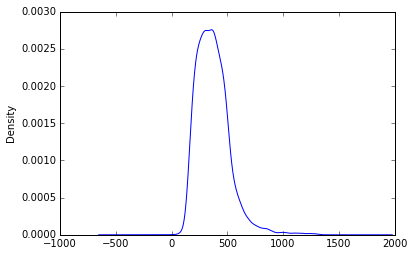

In [18]:
#d_exp['pao2'].plot(kind='kde')
(10/4 * d_exp['pao2']).plot(kind='kde')

In [13]:
#feats = ['pbto2', 'spo2', 'hco3a', 'icp1', 'map', 'paco2', 'pao2', 'pha', 'bo2']
feat1 = 'pao2'
feat2 = 'pbto2'
x = d_exp.copy()
x = x[['uid', 'tsi_min', feat1, feat2]].dropna()
x[feat1] = 100 * (x[feat1] - x[feat1].min()) / (x[feat1].max() - x[feat1].min())
#x[feat2] = (x[feat2] - x[feat2].min()) / (x[feat2].max() - x[feat2].min())
#x = x.rename(columns={feat: 'feature'})
x = x[x['uid'].isin(list(np.random.permutation(x['uid'].unique())[:30]))]

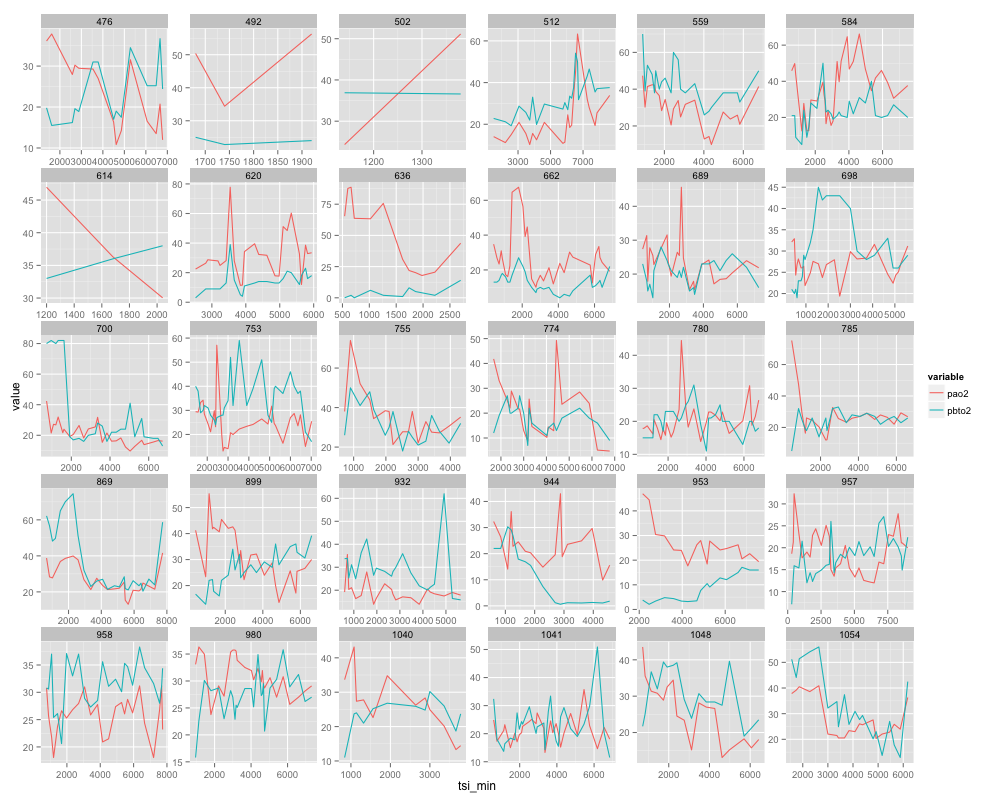

In [14]:
%%R -i x -w 1000 -h 800 -u px
library(dplyr)
library(ggplot2)
library(scales)
library(reshape2)
x %>% mutate_each(funs(as.numeric)) %>% 
    melt(id.vars=c('uid', 'tsi_min')) %>% 
    mutate(uid=factor(uid)) %>%
    ggplot(aes(x=tsi_min, y=value, color=variable)) + geom_line() + facet_wrap(~uid, scales='free')

In [ ]:
%%R -i x -w 1000 -h 800 -u px
library(dplyr)
library(ggplot2)
library(scales)
x %>% mutate_each(funs(as.numeric)) %>% 
    mutate(uid=factor(uid)) %>%
    ggplot(aes(x=tsi_min, y=feature, color=uid)) + geom_line() + facet_wrap(~uid, scales='free')